In [157]:
#import pandas library and load dataset
import pandas as pd
dataset= 'HospitalAttendance.xlsx'
df = pd.read_excel(dataset)
df = df.dropna()  #dropping null values 
df['Date'] = df['Date'].astype('datetime64')
print('Shape of the Dataset', df.shape)
df.head(2)


Shape of the Dataset (30, 25)


,Date,Ado Local Government Area,Agatu Local Government Area,Apa Local Government Area,Buruku Local Government Area,Gboko Local Government Area,Guma Local Government Area,Gwer East Local Government Area,Gwer West Local Government Area,Katsina-Ala Local Government Area,...,Ogbadibo Local Government Area,Ohimini Local Government Area,Oju Local Government Area,Okpokwu Local Government Area,Otukpo Local Government Area,Tarka Local Government Area,Ukum Local Government Area,Ushongo Local Government Area,Vandeikya Local Government Area,Benue
0,2019-01-01,9.0,115.0,51.0,46.0,474.0,62.0,52.0,105.0,157.0,...,73.0,8.0,300.0,34.0,221.0,124.0,178.0,193.0,181.0,4663.0
1,2019-02-01,15.0,135.0,22.0,77.0,953.0,69.0,138.0,270.0,113.0,...,255.0,21.0,416.0,171.0,726.0,178.0,134.0,224.0,367.0,6289.0


<AxesSubplot:>

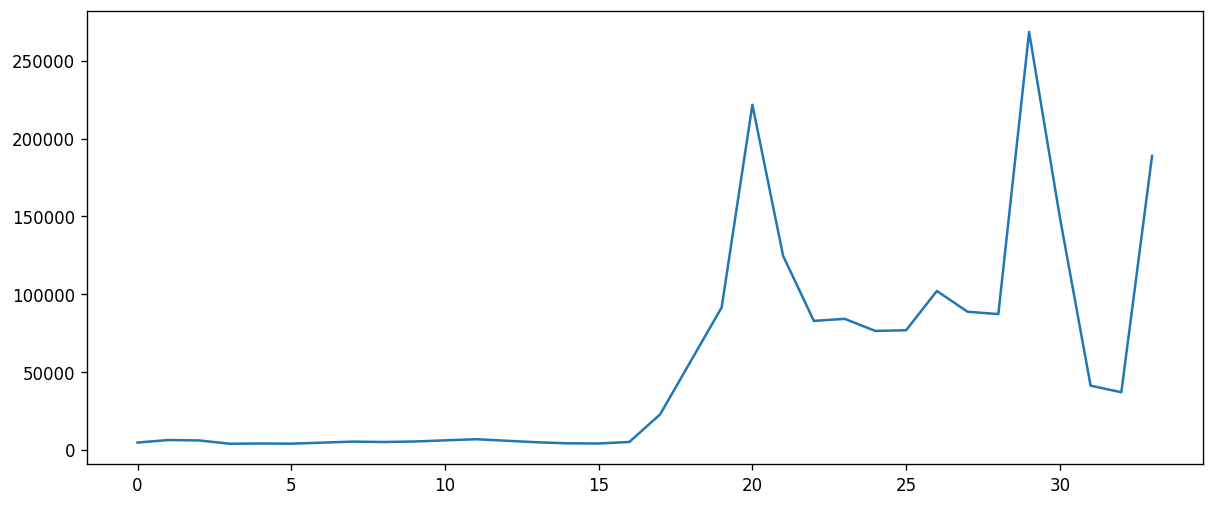

In [158]:
from matplotlib import pyplot as plt
import numpy as np
df['Benue'].plot(figsize=(12,5))

In [159]:
#set Date as index
df.set_index('Date', inplace=True)
df.head(5)
df.tail(5)

,Ado Local Government Area,Agatu Local Government Area,Apa Local Government Area,Buruku Local Government Area,Gboko Local Government Area,Guma Local Government Area,Gwer East Local Government Area,Gwer West Local Government Area,Katsina-Ala Local Government Area,Konshisha Local Government Area,...,Ogbadibo Local Government Area,Ohimini Local Government Area,Oju Local Government Area,Okpokwu Local Government Area,Otukpo Local Government Area,Tarka Local Government Area,Ukum Local Government Area,Ushongo Local Government Area,Vandeikya Local Government Area,Benue
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-01,9916.0,14836.0,665.0,3892.0,23937.0,19249.0,15148.0,4894.0,14894.0,8464.0,...,3834.0,5834.0,7981.0,3663.0,10837.0,1855.0,7583.0,23978.0,31903.0,268560.0
2021-07-01,2346.0,2609.0,3471.0,14298.0,3057.0,923.0,5303.0,2179.0,8022.0,1526.0,...,1651.0,536.0,9115.0,1152.0,9170.0,13745.0,2709.0,23959.0,10954.0,149550.0
2021-08-01,464.0,334.0,61.0,1683.0,1372.0,1969.0,2983.0,291.0,1860.0,928.0,...,106.0,201.0,3277.0,771.0,1622.0,287.0,1665.0,1142.0,1537.0,41243.0
2021-09-01,756.0,353.0,42.0,1947.0,1262.0,1860.0,4135.0,269.0,2856.0,496.0,...,79.0,108.0,4234.0,1030.0,1187.0,269.0,2666.0,1065.0,2069.0,36979.0
2021-10-01,2400.0,3095.0,2268.0,6332.0,13998.0,18959.0,5152.0,3401.0,8820.0,7539.0,...,1943.0,1674.0,9943.0,694.0,22549.0,5091.0,9511.0,5526.0,10414.0,188868.0


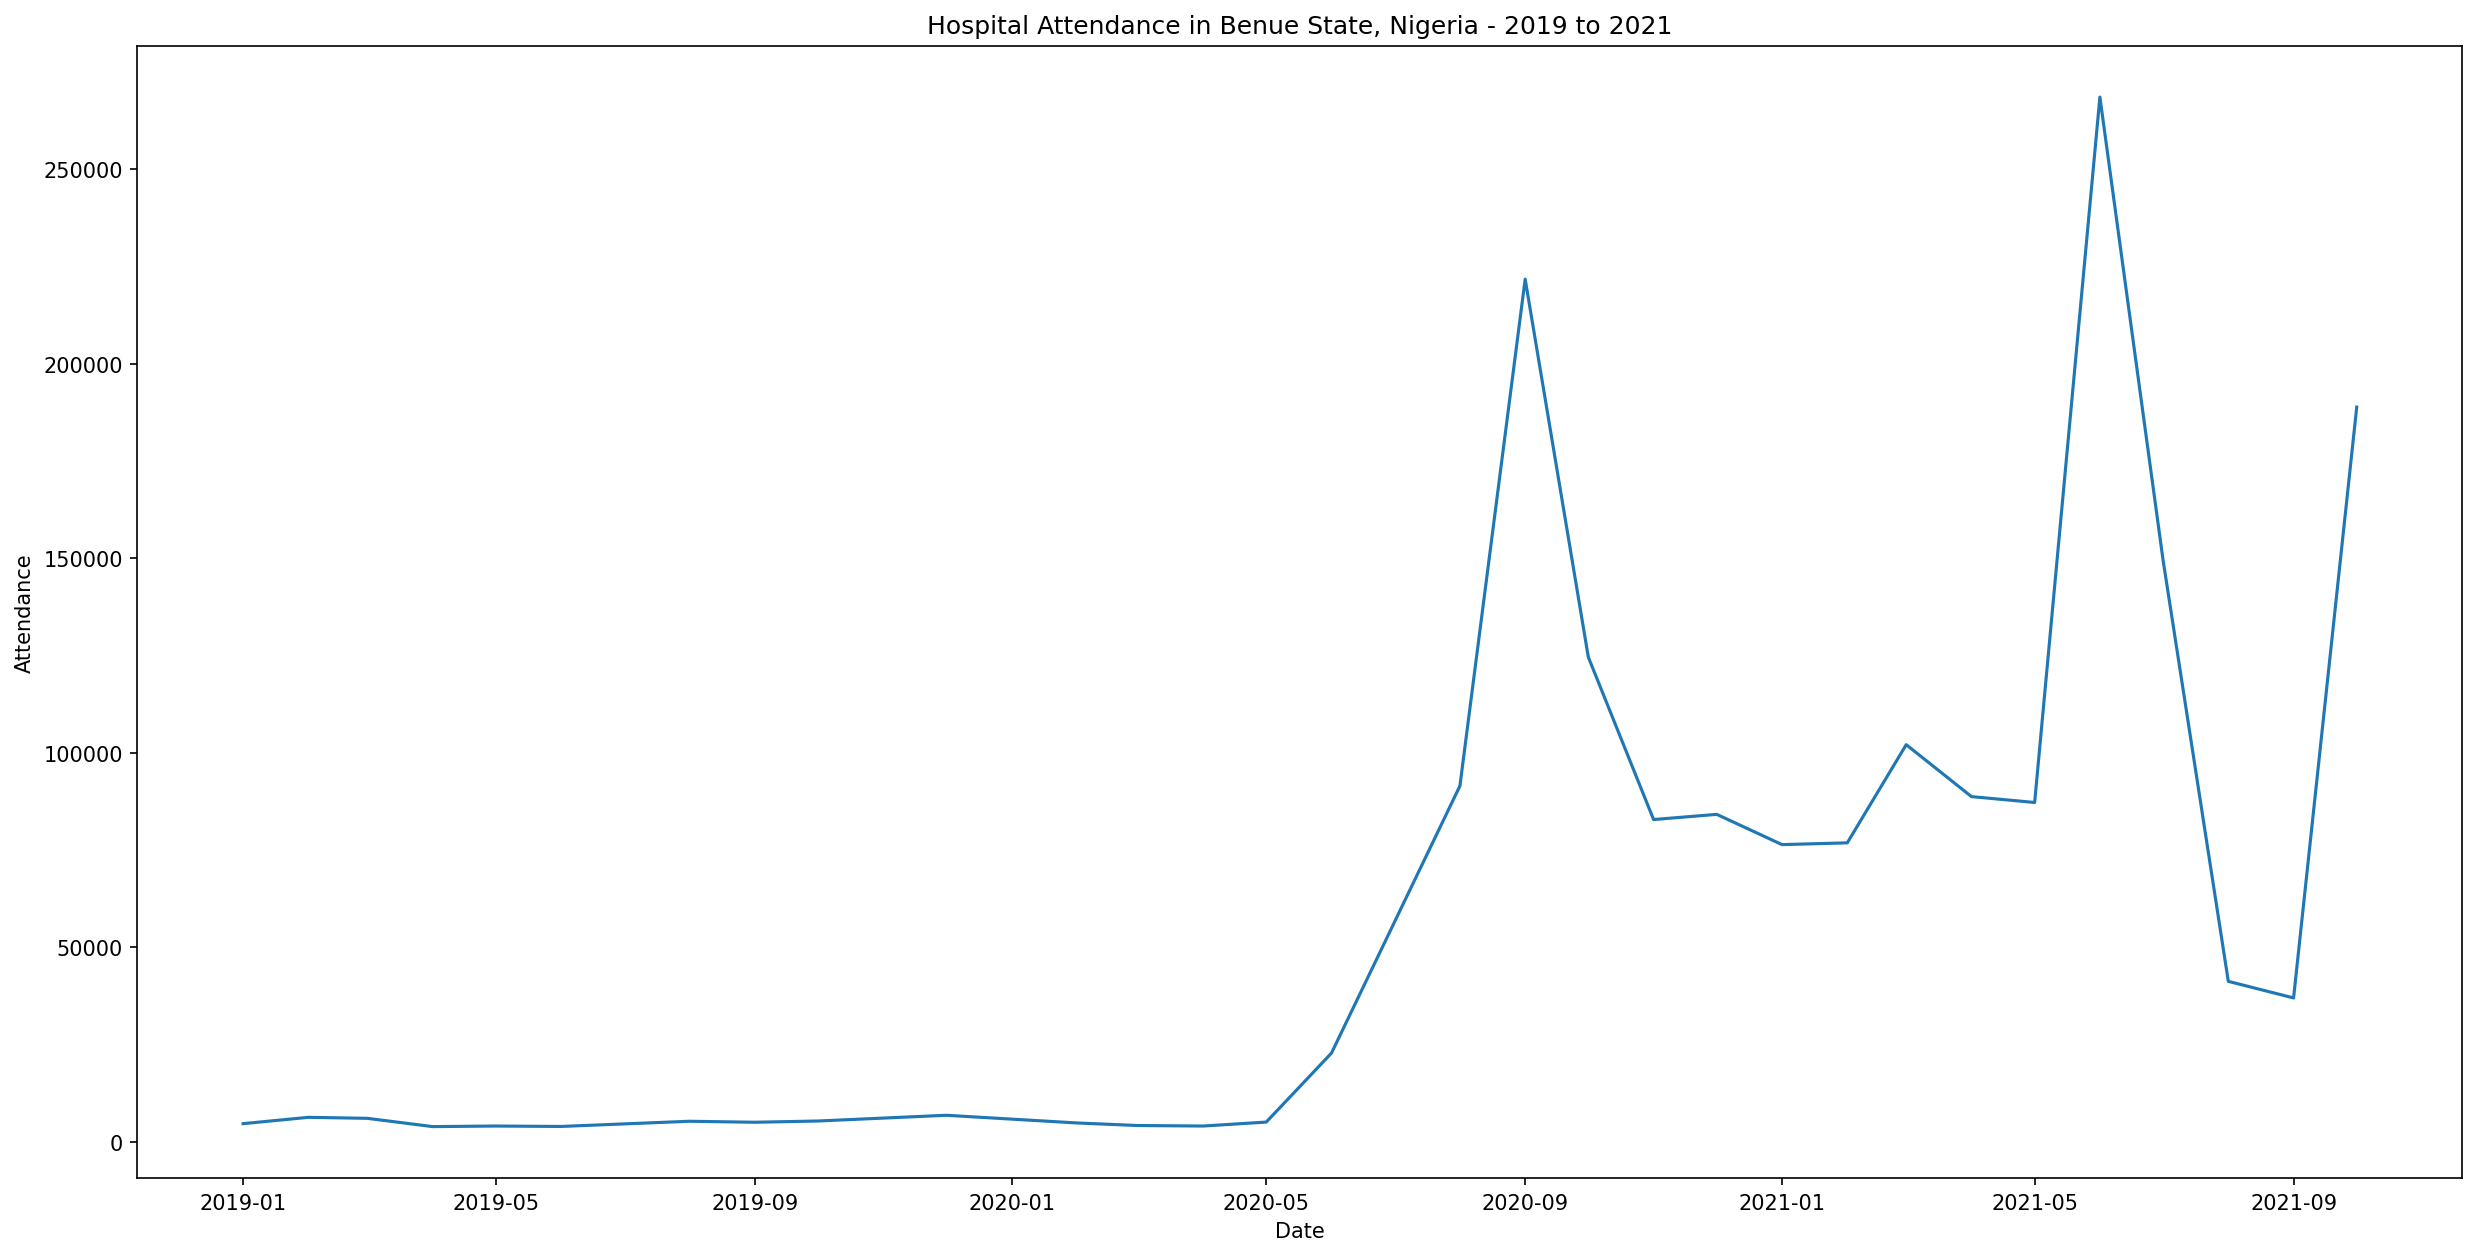

In [160]:
#visualize the data frame as a time - series plot
plt.figure(figsize=(20, 10), dpi=150)
plt.plot(df.index, df['Benue'], color='tab:blue')
plt.gca().set(title='Hospital Attendance in Benue State, Nigeria - 2019 to 2021', 
xlabel='Date', ylabel='Attendance')
plt.show()

<AxesSubplot:title={'center':'Hospital Attendance in Makurdi LGA, Benue - 2019 to 2021'}, xlabel='Date'>

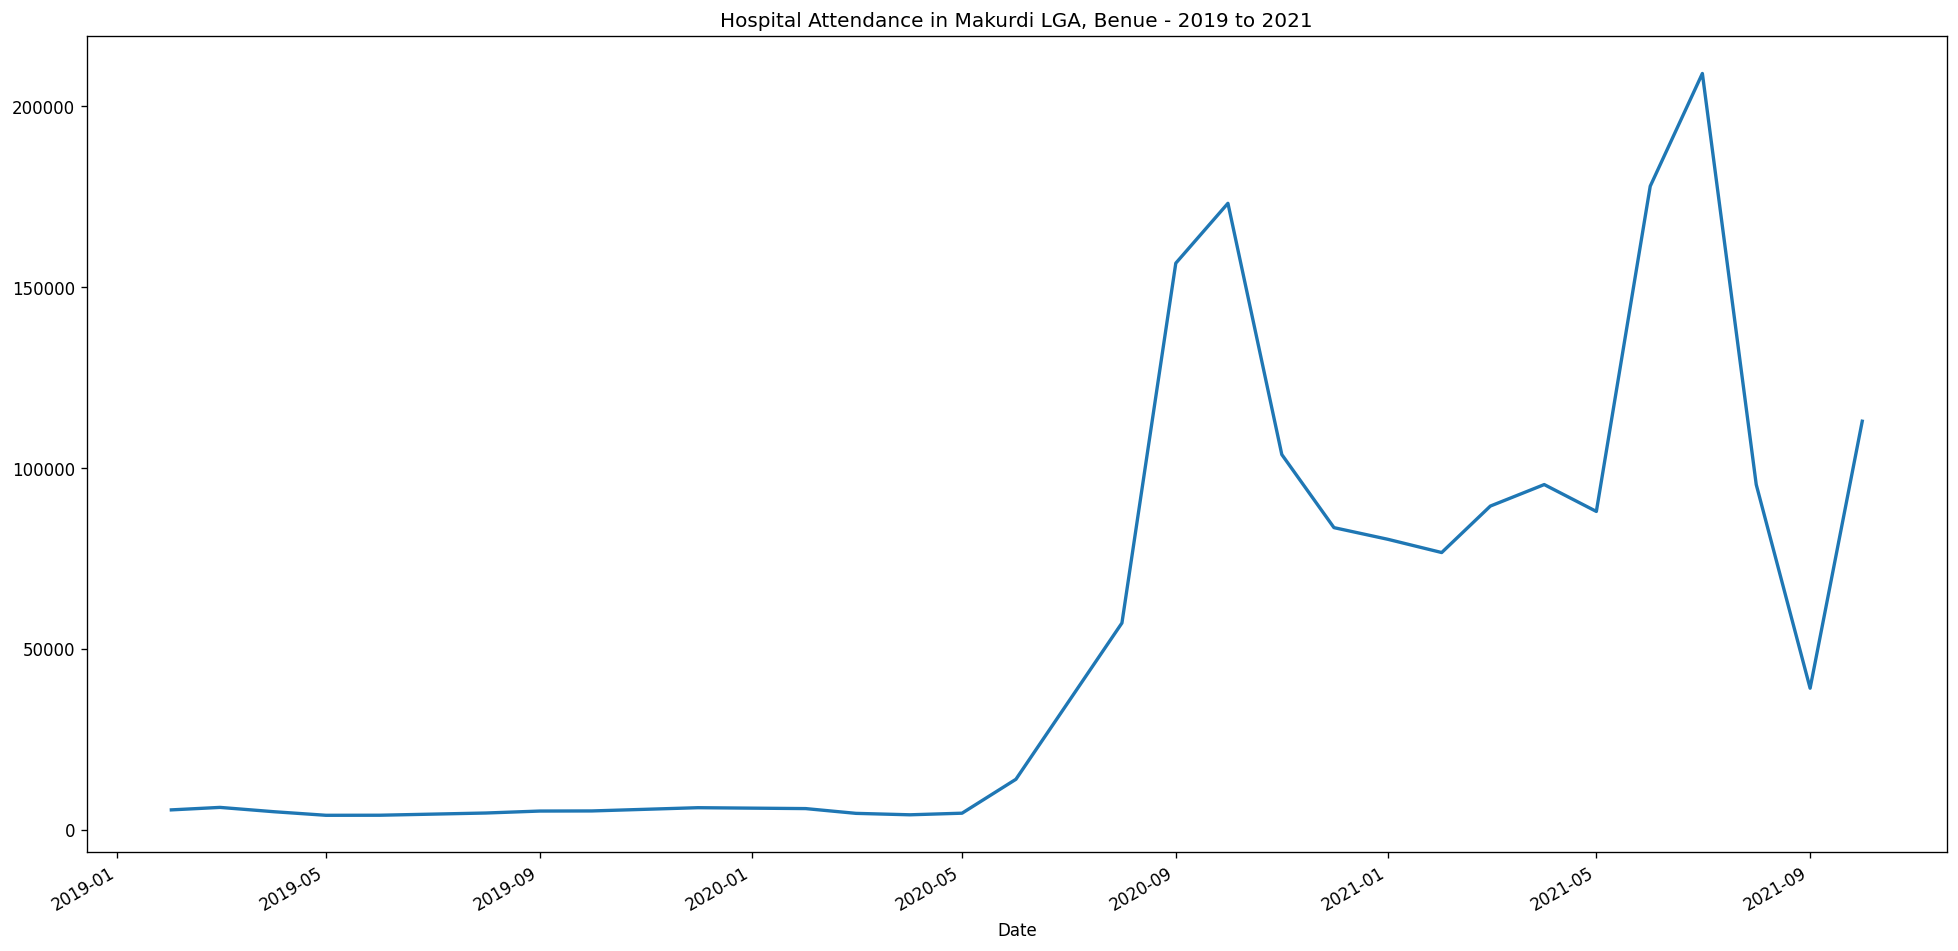

In [161]:
#Smoothing the dataplot using Moving Average Technique
#Since our dataset is not recorded in days(Not bogus), we use a rolling window of 2
Mkd_Attendance_mean = df['Benue'].rolling(window=2).mean()
Mkd_Attendance_mean.plot(figsize=(20, 10), linewidth=2, y='Attendance',
color='tab:blue', title='Hospital Attendance in Makurdi LGA, Benue - 2019 to 2021')

If we consider above plots, there we can slightly see the common pattern in the monthly attendance
to hospitals in Benue State Nigeria in the year range. At the beginning of 2019 till mid 2020 there was a regular
attendance, from mid 2020, attendance rose and then begin to drop and is trying to stabilise in 2021

In [162]:
#differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Benue'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#This is to check if the series is stationery, from this, we know that the series is not stationary
#Because the p-value is greater than 0.05

ADF Statistic: -0.777804
p-value: 0.825555


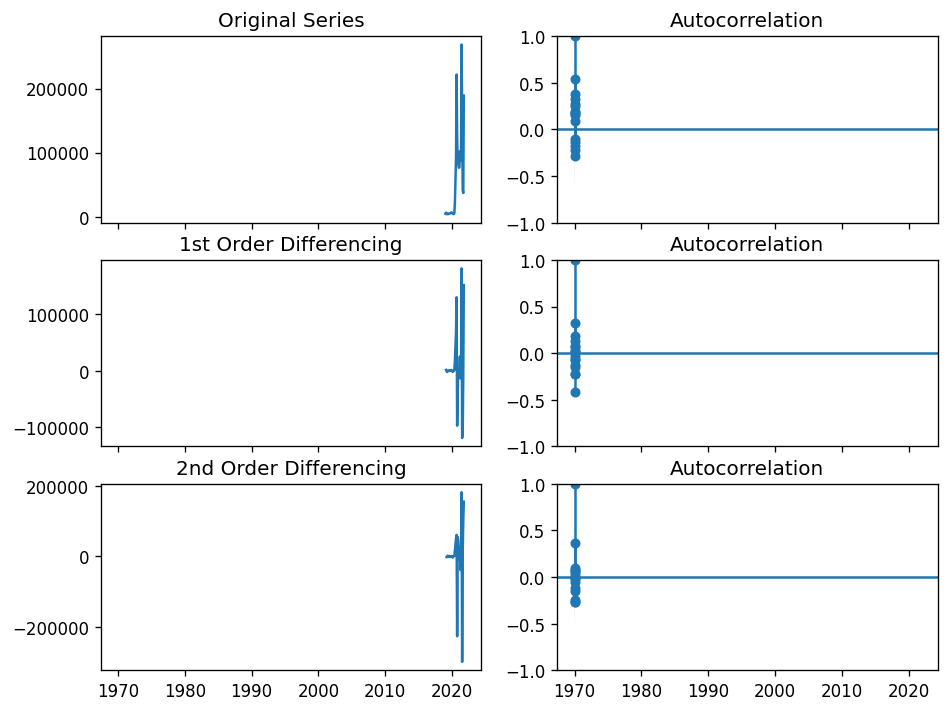

In [163]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Benue); axes[0, 0].set_title('Original Series')
plot_acf(df.Benue, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df.Benue.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Benue.diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(df.Benue.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Benue.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

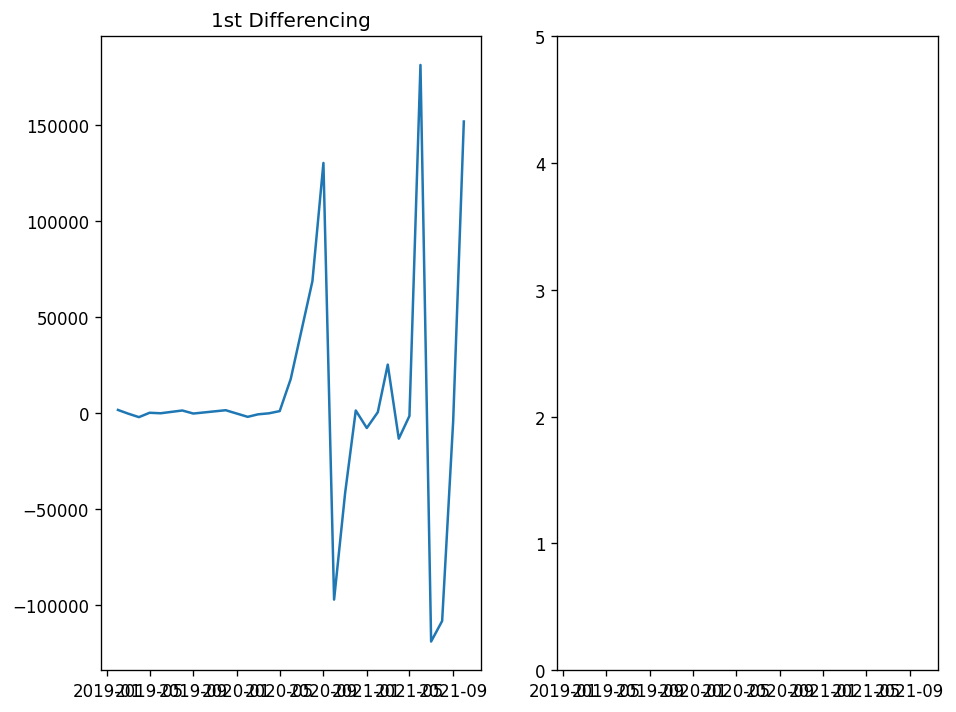

In [164]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Benue.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
# plot_pacf(df.Benue.diff().dropna(), ax=axes[1])
plt.show()


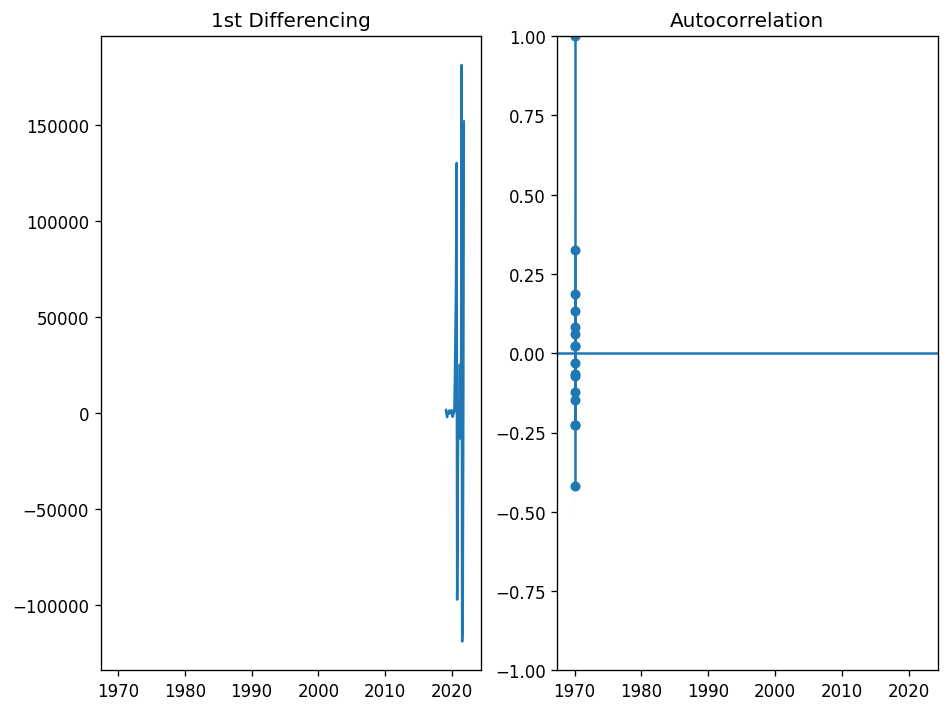

In [165]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Benue.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Benue.diff().dropna(), ax=axes[1])

plt.show()

In [166]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA order (p,d,q)
df.index = pd.DatetimeIndex(df.index).to_period('M')
model = ARIMA(df.Benue, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Benue   No. Observations:                   30
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -358.628
Date:                Sun, 12 Dec 2021   AIC                            725.257
Time:                        20:13:04   BIC                            730.726
Sample:                    01-31-2019   HQIC                           726.970
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0132      0.915     -0.014      0.988      -1.806       1.780
ma.L1         -0.2785      0.895     -0.311      0.756      -2.033       1.476
ma.L2         -0.3883      0.500     -0.777      0.4

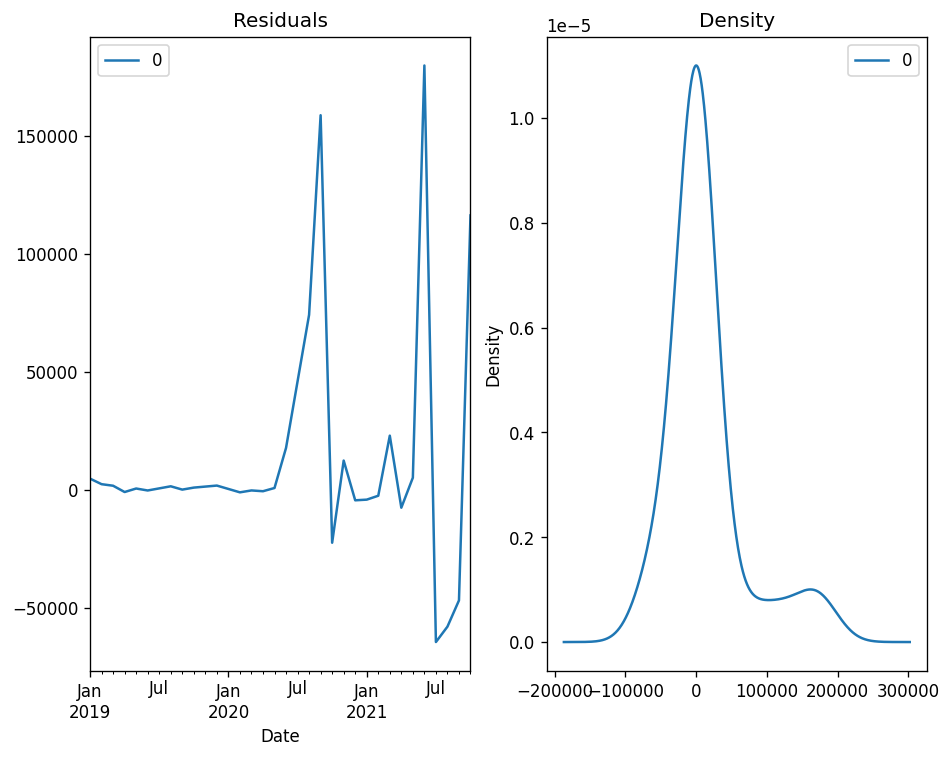

In [167]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [168]:
model_fit.get_prediction(2019, 2021, dynamic=False)

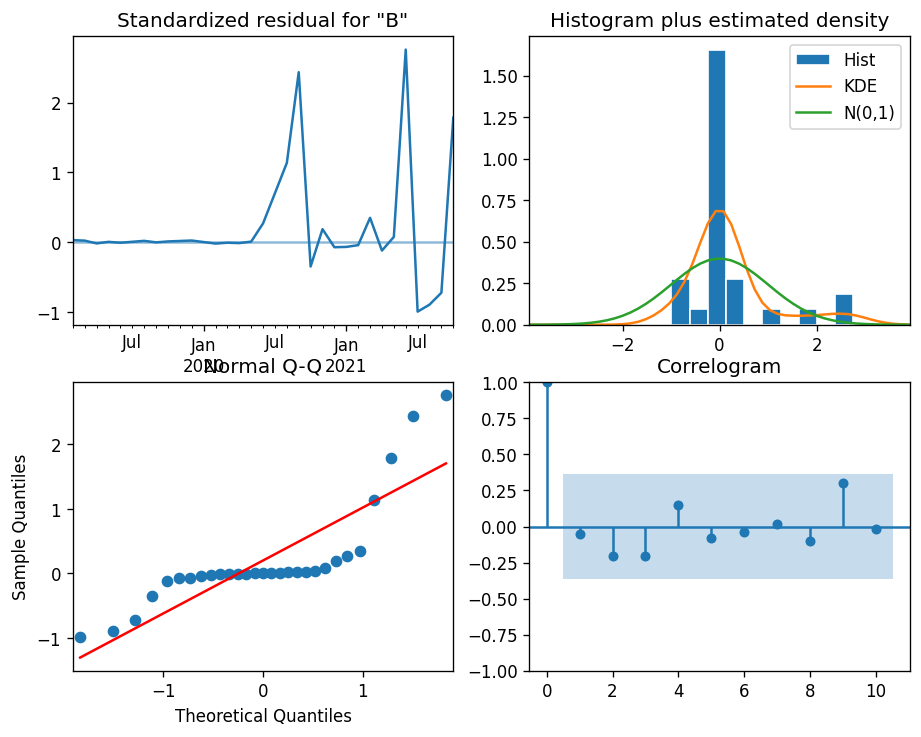

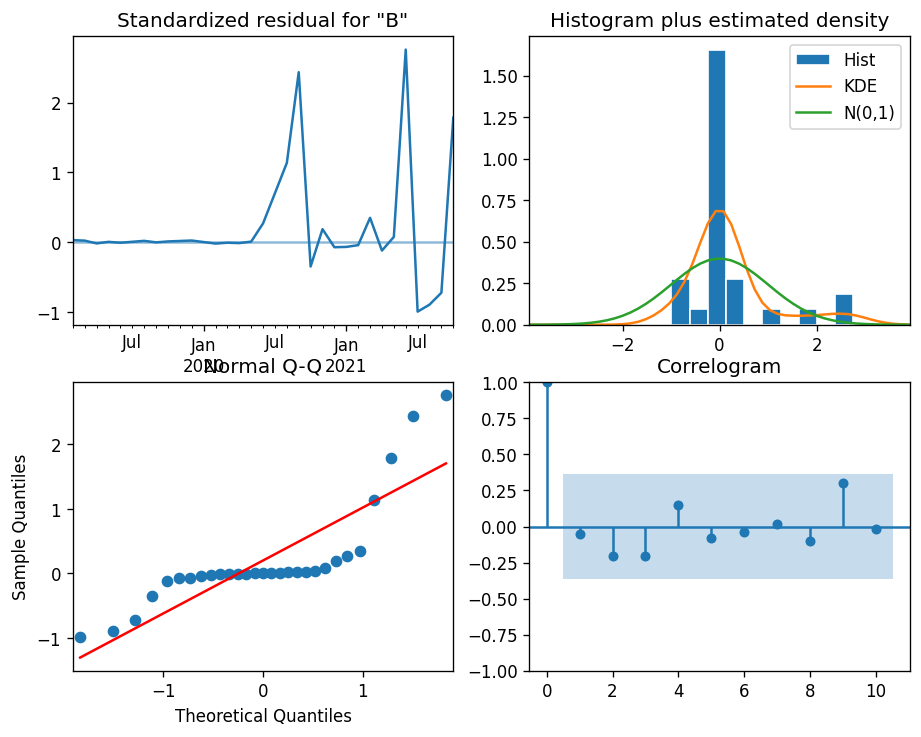

In [169]:
model_fit.plot_diagnostics()

In [170]:
print(residuals.describe())

                   0
count      30.000000
mean    12863.297409
std     53476.993079
min    -64588.557200
25%     -2223.974785
50%       584.752379
75%      4966.913653
max    179757.373568


<AxesSubplot:xlabel='Date'>

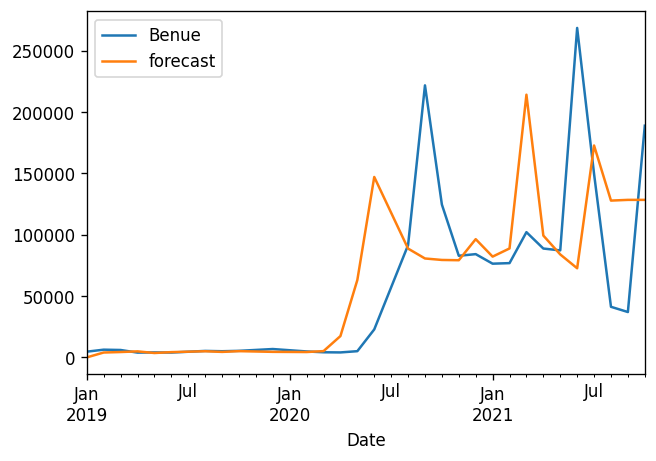

In [179]:
import statsmodels.api as sm
df['forecast']=model_fit.predict(start=0,end=50,dynamic=False)
df[['Benue','forecast']].plot(figsize=(6,4))